In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
riyad=pd.read_csv('Riyadh_results.csv')
global_df=pd.read_csv('global_results.csv')

In [20]:
riyad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      171 non-null    int64  
 1   city      171 non-null    object 
 2   country   171 non-null    object 
 3   avg_temp  169 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB


In [21]:
riyad.describe()

,year,avg_temp
count,171.000000,169.000000
mean,1928.000000,25.214142
std,49.507575,1.046984
min,1843.000000,15.450000
25%,1885.500000,24.870000
50%,1928.000000,25.150000
75%,1970.500000,25.590000
max,2013.000000,27.780000


here we get min year 1843
and max is 2013 this will be our range

In [22]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [23]:
global_df.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


so we have do cut global data between range 1843 to 2013

In [4]:
global_df= global_df[(global_df['year'] > 1842 )& (global_df['year'] < 2014)]
global_df.describe()

,year,avg_temp
count,171.000000,171.000000
mean,1928.000000,8.536784
std,49.507575,0.464516
min,1843.000000,7.560000
25%,1885.500000,8.180000
50%,1928.000000,8.520000
75%,1970.500000,8.760000
max,2013.000000,9.730000


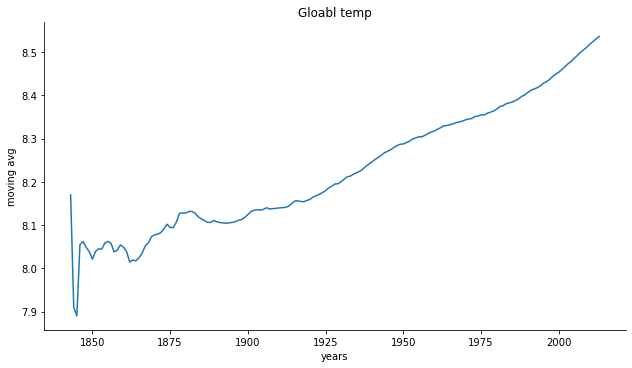

In [34]:
p=sns.relplot(data=global_df,
x=(global_df['year']),y=(global_df['avg_temp'].expanding().mean()),kind='line',aspect=(16/9)
).set(title='Gloabl temp').set_ylabels('moving avg').set_xlabels('years').savefig('Galoabl_chart_output.jpg')



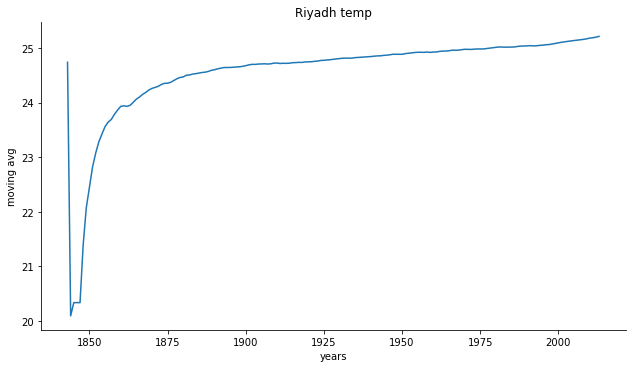

In [6]:
p=sns.relplot(data=riyad,
x=(riyad['year']),y=(riyad['avg_temp'].expanding().mean()),kind='line',aspect=(16/9)
).set(title='Riyadh temp').set_ylabels('moving avg').set_xlabels('years').savefig('Riyadh_chart_output.jpg')

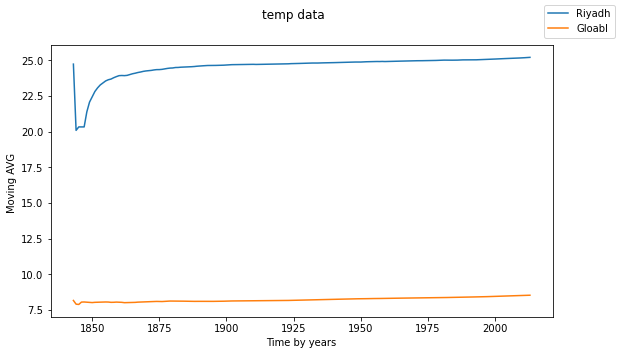

In [33]:
fig,plot =plt.subplots()
plot= sns.lineplot(x=riyad['year'], y=riyad['avg_temp'].expanding().mean())
plot2 = sns.lineplot(x=global_df['year'], y=global_df['avg_temp'].expanding().mean())
fig.legend(['Riyadh','Gloabl'])
fig.suptitle('temp data')
fig.set_figheight(5)
fig.set_figwidth(9)
plot.set_xlabel('Time by years')
plot.set_ylabel('Moving AVG ')
fig.savefig('subfig.jpg')